In [14]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datapath = "/data/Misc"
filename = "20230327_183100_AlRes.csv"
line_atten_dB = 56.5

In [15]:
data = pd.read_csv(os.path.join(datapath,filename),header=2)
key_f, key_lm, key_deg = data.keys()
data["phi"] = data[key_deg] * np.pi/180.
data

,! Stimulus(Hz),S21(dB),S21(°),phi
0,4.241923e+09,-5.879573,61.732265,1.077431
1,4.241923e+09,-6.010329,60.942120,1.063641
2,4.241923e+09,-5.946432,60.747684,1.060247
3,4.241923e+09,-5.997968,60.716066,1.059695
4,4.241923e+09,-6.013420,61.124918,1.066831
...,...,...,...,...
19995,4.242073e+09,-5.955793,63.692774,1.111649
19996,4.242073e+09,-5.841156,63.239982,1.103746
19997,4.242073e+09,-5.932522,62.793736,1.095957
19998,4.242073e+09,-6.010081,63.775860,1.113099


(4.241923, 4.242073)

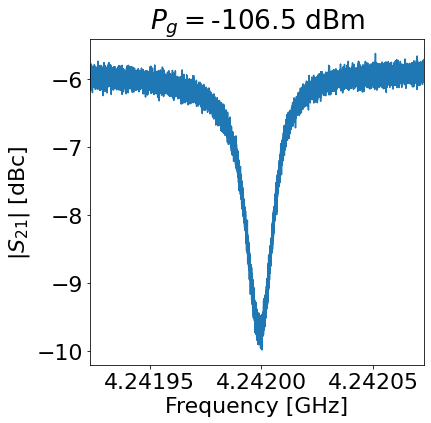

In [19]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel("Frequency [GHz]")
ax0.set_ylabel(r"$|S_{21}|$ [dBc]")
ax0.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax0.plot(data[key_f]/1e9,data[key_lm])
ax0.set_xlim([np.min(data[key_f])/1e9,np.max(data[key_f])/1e9])

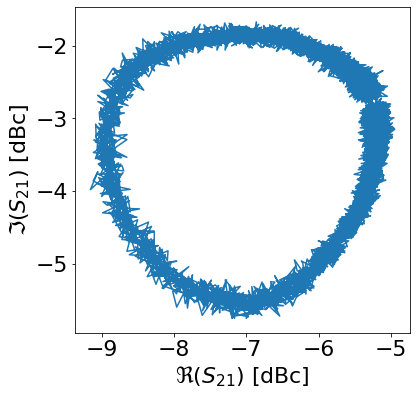

In [18]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel(r"$\Re(S_{21})$ [dBc]")
ax0.set_ylabel(r"$\Im(S_{21})$ [dBc]")
ax0.plot(data[key_lm]*np.sin(data["phi"]),data[key_lm]*np.cos(data["phi"]))